### Gender Wage Gap and Salary Prediction

[Berra Karayel] Capstone 2 Modeling

In [23]:
#loading necessary modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#loading the cleaned salary data set
df = pd.read_csv("/content/salary_cleaned.csv")

In [ ]:
df.head()

,Unnamed: 0,Gender,Age,Country,Education,Major,Profession,Industry,Experience,Annual_Salary,target
0,2,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",15000
1,3,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",5000
2,5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",5000
3,7,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",15000
4,8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000",5000


In [ ]:
df["Gender"].value_counts(normalize=True)

Male                       0.834570
Female                     0.154367
Prefer not to say          0.008070
Prefer to self-describe    0.002994
Name: Gender, dtype: float64

In [ ]:
df = df[df['Gender'] != "Prefer not to say"]
df = df[df['Gender'] != "Prefer to self-describe"]

In [ ]:
df["Gender"].value_counts(normalize=True)

Male      0.843906
Female    0.156094
Name: Gender, dtype: float64

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,Gender,Age,Country,Education,Major,Profession,Industry,Experience,Annual_Salary,target
0,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",15000
1,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",5000
2,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",5000
3,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",15000
4,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000",5000


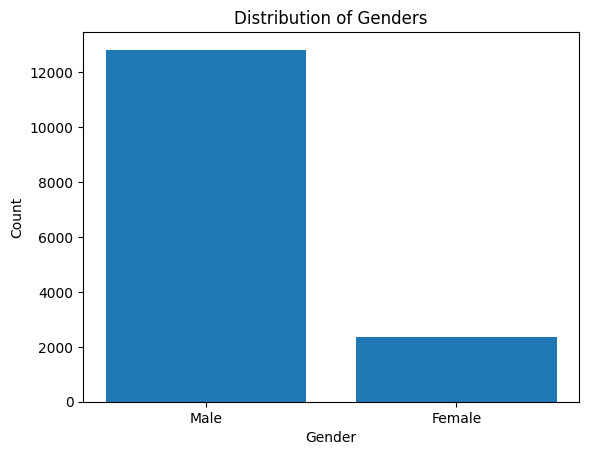

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

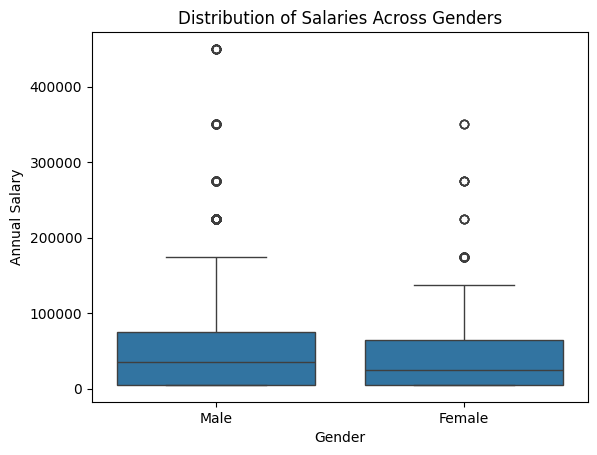

In [ ]:
sns.boxplot(x='Gender', y='target', data=df)
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.title('Distribution of Salaries Across Genders')
plt.show()

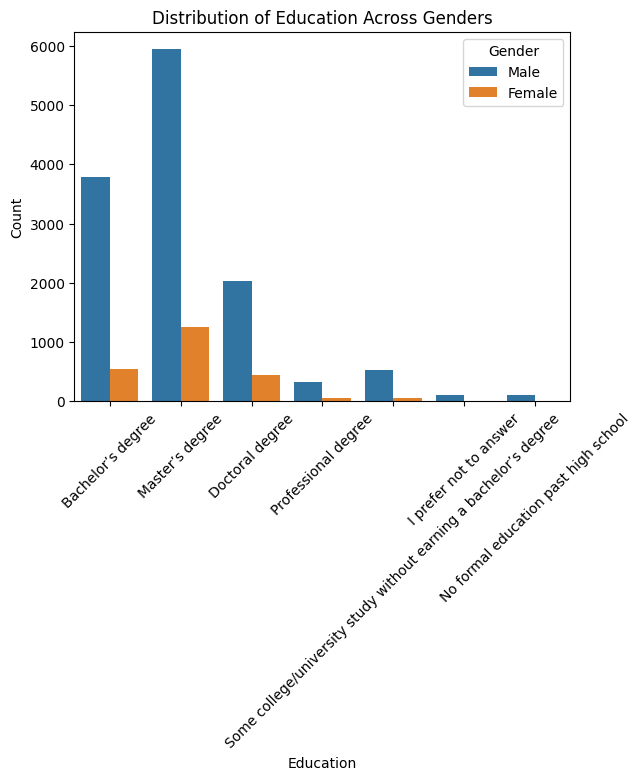

In [ ]:
sns.countplot(x='Education', hue='Gender', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Across Genders')
plt.xticks(rotation=45)
plt.show()

          count          mean           std     min     25%      50%      75%  \
Gender                                                                          
Female   2372.0  43095.489039  46037.538191  5000.0  5000.0  25000.0  65000.0   
Male    12824.0  49720.835933  56411.449763  5000.0  5000.0  35000.0  75000.0   

             max  
Gender            
Female  350000.0  
Male    450000.0  


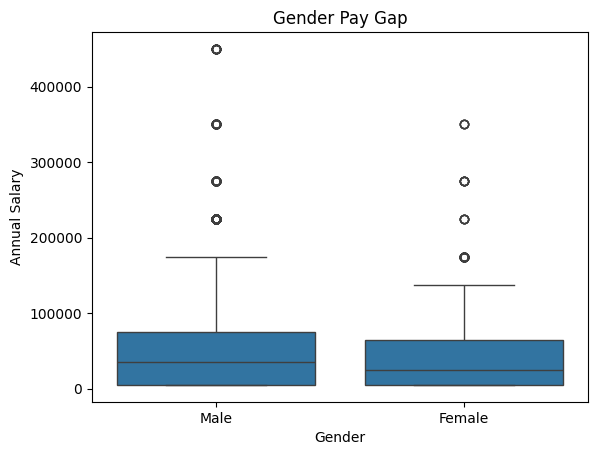

In [ ]:
gender_pay_stats = df.groupby('Gender')['target'].describe()
print(gender_pay_stats)

sns.boxplot(x='Gender', y='target', data=df)
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.title('Gender Pay Gap')
plt.show()

In [ ]:
# Separating features and target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Defining categorical features
categorical_features = ['Gender', 'Age', 'Country', 'Education', 'Major', 'Profession', 'Industry', 'Experience', 'Annual_Salary']

# Creating preprocessing pipeline for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [ ]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Fit models with training data and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_preprocessed, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_preprocessed)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-squared: {r2}")
    print("-" * 40)

# Identify the best model based on evaluation metrics
best_model_name = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(X_test_preprocessed)))
print(f"The best model for this project is: {best_model_name}")

Training Linear Regression...
Linear Regression - Mean Squared Error: 1.1346243775216103
Linear Regression - R-squared: 0.9999999996317508
----------------------------------------
Training Decision Tree...
Decision Tree - Mean Squared Error: 0.0
Decision Tree - R-squared: 1.0
----------------------------------------
Training Random Forest...
Random Forest - Mean Squared Error: 0.0
Random Forest - R-squared: 1.0
----------------------------------------
The best model for this project is: Decision Tree


In [ ]:
# Add Gradient Boosting Regressor to the models dictionary
models['Gradient Boosting'] = GradientBoostingRegressor(random_state=42)

# Fit models with training data and evaluate
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_preprocessed, y_train)

    # Predict on test data
    y_pred = model.predict(X_test_preprocessed)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-squared: {r2}")
    print("-" * 40)

# Identify the best model based on evaluation metrics
best_model_name = min(models, key=lambda x: mean_squared_error(y_test, models[x].predict(X_test_preprocessed)))
print(f"The best model for this project is: {best_model_name}")

Training Linear Regression...
Linear Regression - Mean Squared Error: 1.1346243775216103
Linear Regression - R-squared: 0.9999999996317508
----------------------------------------
Training Decision Tree...
Decision Tree - Mean Squared Error: 0.0
Decision Tree - R-squared: 1.0
----------------------------------------
Training Random Forest...
Random Forest - Mean Squared Error: 0.0
Random Forest - R-squared: 1.0
----------------------------------------
Training Gradient Boosting...
Gradient Boosting - Mean Squared Error: 21971592.147535242
Gradient Boosting - R-squared: 0.9928689871529359
----------------------------------------
The best model for this project is: Decision Tree


### Hyperparameter Tuning with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the hyperparameters grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_preprocessed, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_gb_regressor = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_gb_regressor.predict(X_test_preprocessed)

# Evaluate the best model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Best Gradient Boosting Regressor - Mean Squared Error: {mse}")
print(f"Best Gradient Boosting Regressor - R-squared: {r2}")

# Identify the best model based on evaluation metrics
print(f"The best hyperparameters for Gradient Boosting Regressor are: {best_params}")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target variable
features = ['Gender', 'Age', 'Country', 'Education', 'Major', 'Profession', 'Industry', 'Experience']
target = 'target'

# Split features and target variable for training and testing sets
X_train = df_train[features]
y_train = df_train[target]
X_test = df_test[features]
y_test = df_test[target]

# Preprocess categorical variables
categorical_features = ['Gender', 'Country', 'Education', 'Major', 'Profession', 'Industry']
numeric_features = ['Age', 'Experience']

# Create a pipeline for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Numeric features pass through
        ('cat', OneHotEncoder(), categorical_features)  # Categorical features one-hot encoded
    ])

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create a pipeline including preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', gb_classifier)])

# Define the hyperparameters grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__max_depth': [3, 5, 7],
    'classifier__min_samples_split': [2, 5, 10],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_gb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred_train = best_gb_model.predict(X_train)
y_pred_test = best_gb_model.predict(X_test)

# Evaluate the best model's performance
train_accuracy = best_gb_model.score(X_train, y_train)
test_accuracy = best_gb_model.score(X_test, y_test)
print(f"Training Set Accuracy: {train_accuracy:.4f}")
print(f"Testing Set Accuracy: {test_accuracy:.4f}")

# Classification report for detailed performance metrics
print("Classification Report on Training Set:")
print(classification_report(y_train, y_pred_train))
print("Classification Report on Testing Set:")
print(classification_report(y_test, y_pred_test))

Training Set Accuracy: 0.5907
Testing Set Accuracy: 0.4967
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.75      0.78      0.77      3468
           1       0.48      0.62      0.54      2652
           2       0.56      0.23      0.33      1659
           3       0.46      0.54      0.50      1856
           4       0.58      0.53      0.55      1476
           5       0.71      0.64      0.67      1045

    accuracy                           0.59     12156
   macro avg       0.59      0.56      0.56     12156
weighted avg       0.60      0.59      0.58     12156

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.71      0.74      0.73       895
           1       0.42      0.53      0.47       637
           2       0.31      0.13      0.18       400
           3       0.35      0.42      0.38       448
           4       0.39      0.34      0.36       

/Users/berrakarayel/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/berrakarayel/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/berrakarayel/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py", line 412, in fit
    X, y = self._validate_data(X, y, accept_sparse=['csr', 'csc', 'coo'],
  File "/Users/berrakarayel/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/berrakarayel/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/Users/berrakarayel/opt/anaconda3/li

### Model Training

In [ ]:
features = ['Gender', 'Age', 'Country', 'Education', 'Major', 'Profession', 'Industry', 'Experience', 'Annual_Salary']
target = ["target"]

df = df[features + target]

df = df.fillna('?')

In [ ]:
#Our classifier needs to understand our data, therefore we categorize it.
#However, age and experience have a logical order that I need to keep, so I took the average of each interval as the feature.

dic_age = {'30-34': 32, '22-24': 23, '35-39': 37, '18-21': 19.5, '40-44': 42, '25-29': 27, '55-59': 57, '60-69': 64.5, '45-49': 47, '50-54': 52, '70-79': 74.5, '80+': 80}
dic_exp = {'5-10': 7.5, '0-1': 0.5, '10-15': 12.5, '3-4': 3.5, '1-2': 1.5, '2-3': 2.5, '15-20': 17.5, '4-5': 4.5, '25-30': 27.5, '20-25': 22.5, '30 +': 30, '?': 0}

df['Age'] = df['Age'].apply(lambda x: dic_age[x])
df['Experience'] = df['Experience'].apply(lambda x: dic_exp[x])

for q in ["Gender", "Country", "Education", "Major", "Profession", "Industry"]:
    df[q] = df[q].astype('category')

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

#### Target

In this case, the response variable ('target') represents annual salary and is continuous. Therefore, we're dealing with a regression problem. However, I tackled the problem as a classification one since a regression one might give a bad accuracy on lower salaries. It is important to make a distinction among earning between 40K and 60K than between earning 200K-250K.

Therefore 6 categories were made:

1. less than 10k
2. between 10k and 30k
3. between 30k and 50k
4. between 50k and 80k
5. between 80k and 125k
6. more than 100k

In [ ]:
classes = ['less than 10k', 'between 10k and 30k', 'between 30k and 50k', 'between 50k and 80k', 'between 80k and 125k', 'more than 100k']

In [ ]:
dic_target = {5000: 0,
              15000: 1, 25000: 1,
              35000: 2, 45000: 2,
              55000: 3,  65000: 3,  75000: 3,
              85000: 4, 95000: 4, 112500: 4,
              137500: 5,  175000: 5, 225000: 5, 275000: 5, 350000: 5,  450000: 5
             }

df['target'] = df['target'].apply(lambda x: dic_target[x])

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df['target'])
#plt.xticks(range(0, 7), classes)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Yearly income ($)", fontsize=12)
plt.title("Reparition of our New Classes", fontsize=15)
plt.show()

In [ ]:
df.head()

In [28]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [ ]:
print(f"Training on {df_train.shape[0]} samples.")

Training on 12156 samples.


### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

features = ['Gender', 'Age', 'Country', 'Education', 'Major', 'Profession', 'Industry', 'Experience']

def run_gradient_boosting(df_train, df_test):
    params = {
        "n_estimators": 1000,
        "learning_rate": 0.05,
        "subsample": 0.7,
        "min_samples_split": 50,
        "max_depth": 3,
        "random_state": 42,
    }

    X_train = df_train[features]
    y_train = df_train["target"]
    X_test = df_test[features]
    y_test = df_test["target"]

    gradient_boosting_model = GradientBoostingClassifier(**params)
    gradient_boosting_model.fit(X_train, y_train)

    # Evaluate the model's performance
    train_accuracy = gradient_boosting_model.score(X_train, y_train)
    test_accuracy = gradient_boosting_model.score(X_test, y_test)
    print(f"Training Set Accuracy: {train_accuracy:.4f}")
    print(f"Testing Set Accuracy: {test_accuracy:.4f}")

    # Make predictions
    y_pred_train = gradient_boosting_model.predict(X_train)
    y_pred_test = gradient_boosting_model.predict(X_test)

    # Classification report for detailed performance metrics
    print("Classification Report on Training Set:")
    print(classification_report(y_train, y_pred_train))
    print("Classification Report on Testing Set:")
    print(classification_report(y_test, y_pred_test))

    return gradient_boosting_model

# Train the gradient boosting model
gradient_boosting_model = run_gradient_boosting(df_train, df_test)

Training Set Accuracy: 0.6113
Testing Set Accuracy: 0.4885
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      3468
           1       0.52      0.61      0.57      2652
           2       0.52      0.35      0.42      1659
           3       0.50      0.56      0.53      1856
           4       0.59      0.52      0.55      1476
           5       0.70      0.64      0.67      1045

    accuracy                           0.61     12156
   macro avg       0.60      0.58      0.59     12156
weighted avg       0.61      0.61      0.61     12156

Classification Report on Testing Set:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       895
           1       0.44      0.51      0.47       637
           2       0.26      0.17      0.21       400
           3       0.35      0.40      0.37       448
           4       0.37      0.31      0.34       

In [46]:
features = ['Gender', 'Age', 'Country', 'Education', 'Major', 'Profession', 'Industry', 'Experience']

def run_lgb(df_train, df_test):
    params = {"objective" : "multiclass",
              "num_class": 6,
              "metric" : "multi_error",
              "num_leaves" : 30,
              "min_child_weight" : 50,
              "learning_rate" : 0.05,
              "bagging_fraction" : 0.7,
              "feature_fraction" : 0.7,
              "bagging_seed" : 420,
              "verbosity" : -1
             }

    lg_train = lgb.Dataset(df_train[features], label=(df_train["target"].values))
    lg_test = lgb.Dataset(df_test[features], label=(df_test["target"].values))
    model = lgb.train(params, lg_train, 1000, valid_sets=[lg_test], callbacks=[
        lgb.early_stopping(stopping_rounds=100),
    ])

    return model

In [36]:
import lightgbm as lgb
from lightgbm import early_stopping

In [47]:
model = run_lgb(df_train, df_test)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[154]	valid_0's multi_error: 0.517434


In [48]:
pred_train = model.predict(df_train[features], num_iteration=model.best_iteration)
pred_test = model.predict(df_test[features], num_iteration=model.best_iteration)

#### Feature Importance

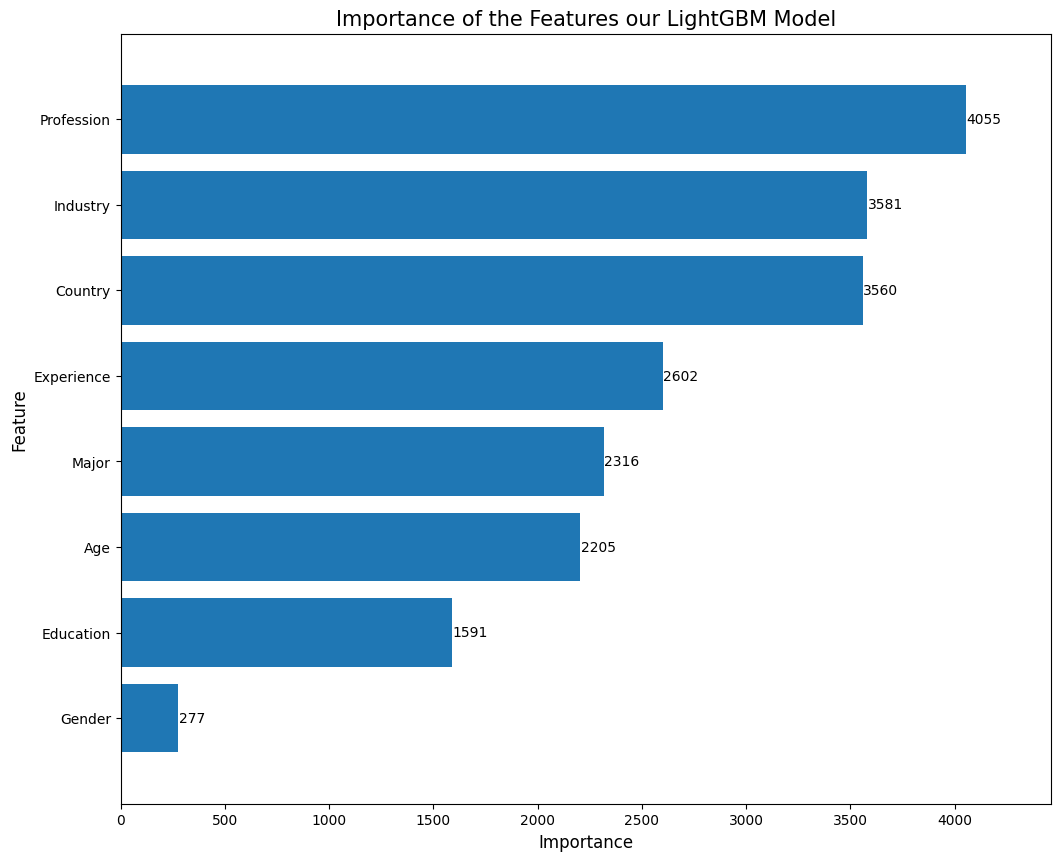

In [49]:
fig, ax = plt.subplots(figsize=(12,10))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.ylabel('Feature', size=12)
plt.xlabel('Importance', size=12)
plt.title("Importance of the Features our LightGBM Model", fontsize=15)
plt.show()

In [50]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', normalize=False, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fmt = '.2f' if normalize else 'd'

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size=15)
    plt.colorbar()
    plt.grid(False)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = (cm.max()+cm.min()) / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', size=12)
    plt.xlabel('Predicted label', size=12)

NameError: name 'itertools' is not defined

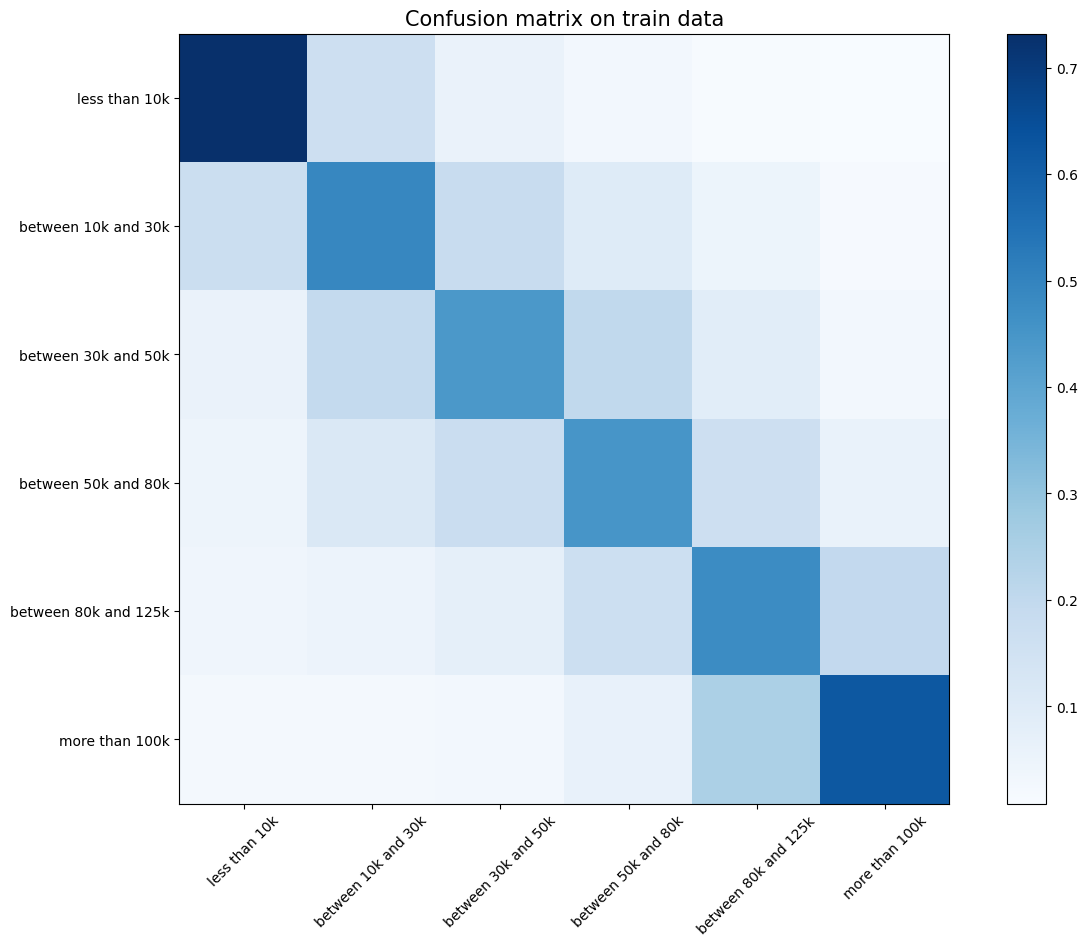

In [51]:
conf_mat_train = confusion_matrix(np.argmax(pred_train, axis=1), df_train[target].values)

plot_confusion_matrix(conf_mat_train, classes, title='Confusion matrix on train data', normalize=True)

NameError: name 'itertools' is not defined

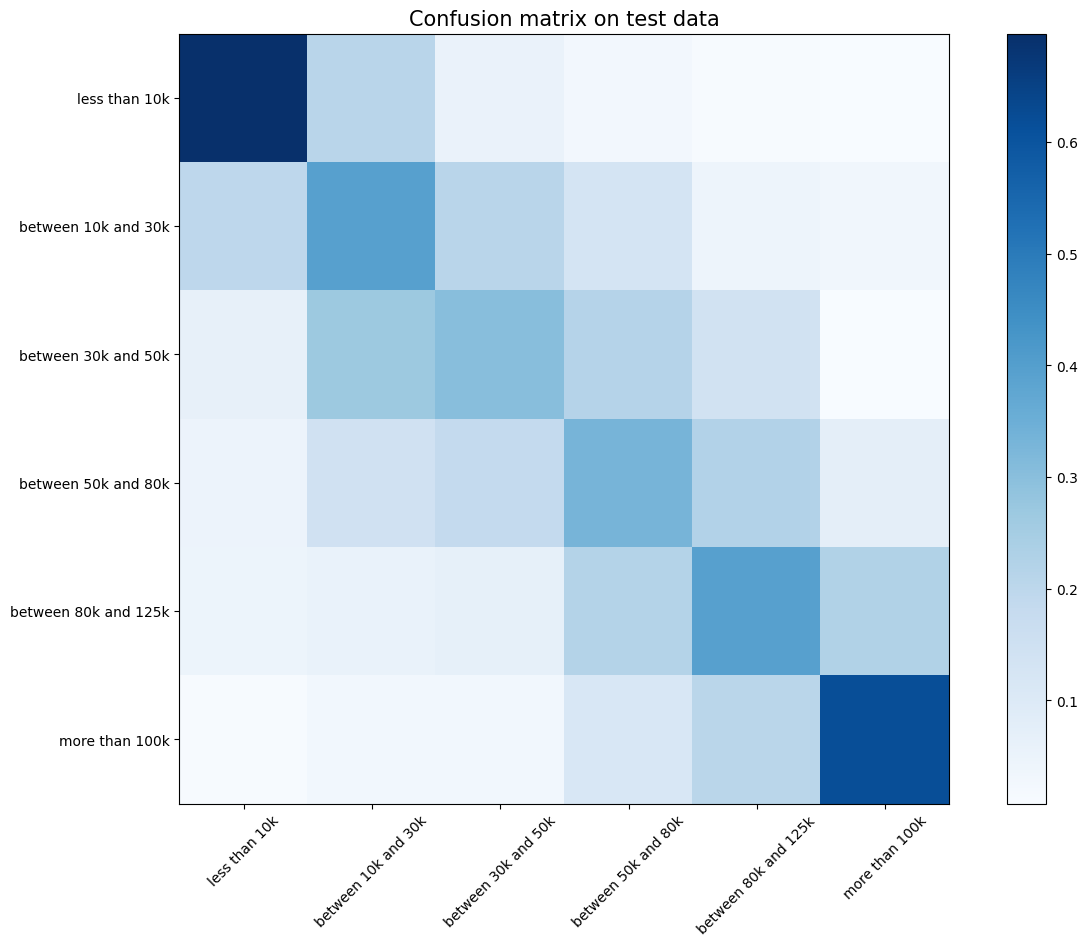

In [52]:
conf_mat_test = confusion_matrix(np.argmax(pred_test, axis=1), df_test[target].values)

plot_confusion_matrix(conf_mat_test, classes, title='Confusion matrix on test data', normalize=True)